In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [45]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print(' Images Folder has ' + str(count) + ' Images')     

barcelona Folder has 10 Images
bayren munchen Folder has 10 Images
liverpool Folder has 9 Images
man utd Folder has 10 Images
milan Folder has 10 Images
real madrid Folder has 10 Images
 Images Folder has 59 Images


In [46]:
base_dir = 'Images'  
batch_size = 11
img_size = 224  


In [47]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='training',
    batch_size=batch_size,
    image_size=(img_size, img_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='validation',
    batch_size=batch_size,
    image_size=(img_size, img_size)
)


Found 20 files belonging to 6 classes.
Using 16 files for training.
Found 20 files belonging to 6 classes.
Using 4 files for validation.


In [48]:
clubs = train_ds.class_names
print(clubs)

['barcelona', 'bayren munchen', 'liverpool', 'man utd', 'milan', 'real madrid']


In [49]:
import matplotlib.pyplot as plt

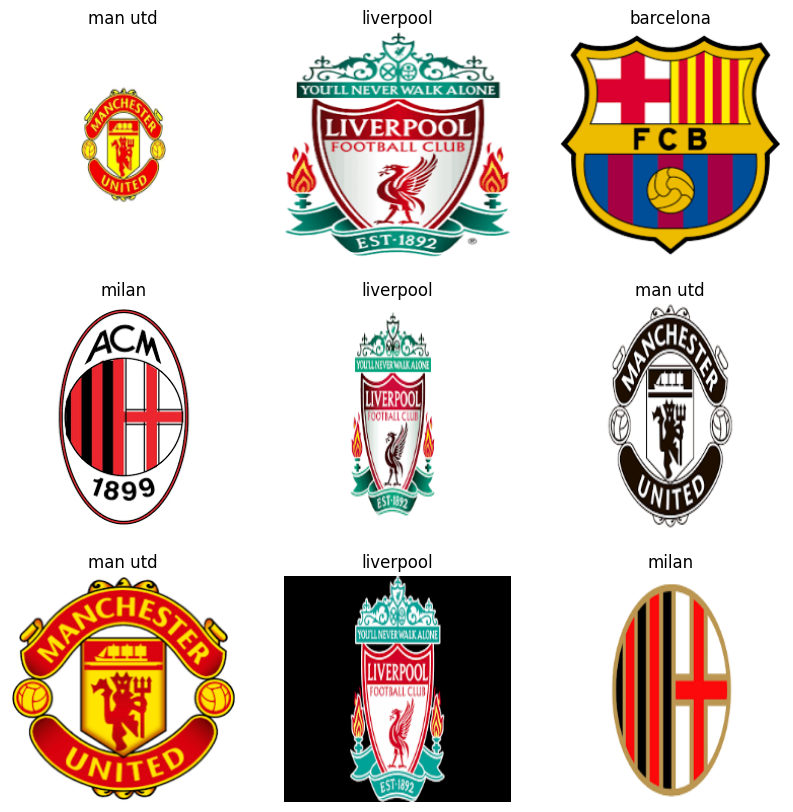

In [50]:
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(clubs[labels[i]])
        plt.axis('off')

In [51]:
AUTOTUNE = tf.data.AUTOTUNE

In [52]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)

In [53]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

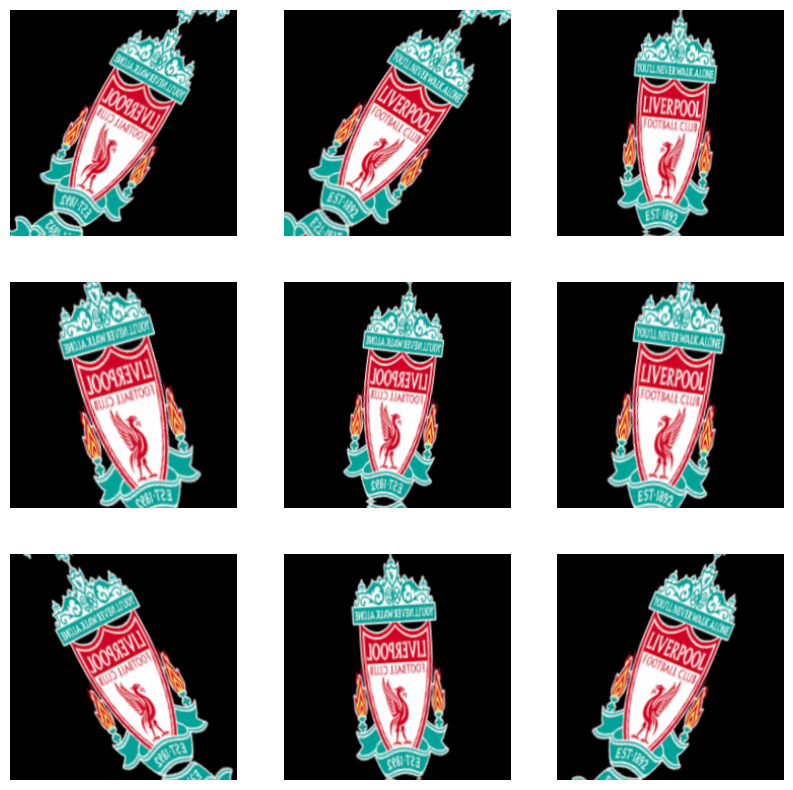

In [55]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')


In [56]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(clubs), activation='softmax')
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape       ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)   │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ conv2d_12 (Conv2D)        │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ max_pooling2d_12          │ ?                  │          0 │
│ (MaxPooling2D)            │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ conv2d_13 (Conv2D)        │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ max_pooling2d_13          │ ?                  │          0 │
│ (MaxPooling2D)            │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ conv2d_14 (Conv2D)        │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ max_pooling2d_14          │ ?                  │          0 │
│ (MaxPooling2D)            │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ flatten_4 (Flatten)       │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ dropout_4 (Dropout)       │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_7 (Dense)           │ ?                  │          0 │
│                           │                    │  (unbuilt) │
├───────────────────────────┼────────────────────┼────────────┤
│ dense_8 (Dense)           │ ?                  │          0 │
│                           │                    │  (unbuilt) │
└───────────────────────────┴────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.1083 - loss: 3.0447 - val_accuracy: 0.0000e+00 - val_loss: 6.4343
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.4417 - loss: 2.7188 - val_accuracy: 0.2500 - val_loss: 3.1554
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.4000 - loss: 1.7631 - val_accuracy: 0.7500 - val_loss: 2.5033
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.8333 - loss: 0.7669 - val_accuracy: 0.0000e+00 - val_loss: 2.6802
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.8561 - loss: 0.8236 - val_accuracy: 0.0000e+00 - val_loss: 3.3453
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 1.0000 - loss: 0.3464 - val_accuracy: 0.0000e+00 - val_loss: 3.6913
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 1.0000 - loss: 0.3477 - val_accuracy: 0.0000e+00 - val_loss: 4.5433
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - accuracy: 0.9583 - loss: 0.1349 - val_accuracy: 

In [1]:
 def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
   
    outcome = 'The image belongs to ' + clubs[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)
    return outcome

In [61]:
print(classify_images('Sample/Liverpool.png'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
The image belongs to liverpool with a score of 32.30830430984497


In [62]:
model.save('Image_Classify_Model.keras')